**Step-I** Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

**Step-2**  Fetching historical data of 6 years ranging in between 01-01-2013 to 31-12-2018. The starting and ending dates need to be set and then passed off as parameters to the function in order to fetch the data.
The data has been fetched using nsepy function and then stored as a csv file. The csv file is to be loaded.

In [2]:
stk_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/RNN/stk_train_data.csv')

In [3]:
stk_data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2013-01-01,SBIN,EQ,2385.50,2404.9,2434.05,2397.55,2425.3,2426.45,2423.75,1720230,4.169403e+14,64215,662638,0.3852
1,2013-01-02,SBIN,EQ,2426.45,2450.0,2464.00,2438.15,2451.9,2450.55,2453.53,1466012,3.596900e+14,61823,508795,0.3471
2,2013-01-03,SBIN,EQ,2450.55,2460.0,2482.40,2436.20,2470.7,2471.60,2465.12,2010309,4.955653e+14,71411,820537,0.4082
3,2013-01-04,SBIN,EQ,2471.60,2460.0,2492.95,2450.65,2490.0,2486.70,2475.69,1370595,3.393164e+14,62637,231546,0.1689
4,2013-01-07,SBIN,EQ,2486.70,2490.0,2499.00,2461.75,2465.0,2467.60,2481.24,1026449,2.546866e+14,48683,269798,0.2628


In [4]:
stk_data.shape

(1483, 15)

**Step-3** Visualising the day-wise closing prices from the fetched data in the above step

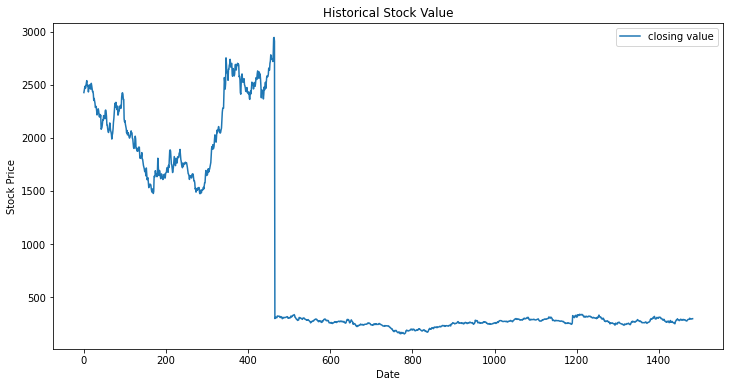

In [23]:
plt.figure(figsize=(12,6))
plt.plot(stk_data['Close'], label="closing value")
plt.title('Historical Stock Value')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.savefig("/content/drive/My Drive/Colab Notebooks/RNN/show.png")
plt.show()

**Step-4** The fetched data contains 14 instances (excluding the index column of the csv file). Only the columns of interest are being selected for creating the main dataset.

In [6]:
df = pd.DataFrame(columns=['Open', 'High', 'Low', 'Close'])

df['Open'] = stk_data['Open']
df['High'] = stk_data['High']
df['Low'] = stk_data['Low']
df['Close'] = stk_data['Close']
df.index = stk_data['Date']


In [7]:
df.head()

,Open,High,Low,Close
Date,,,,
2013-01-01,2404.9,2434.05,2397.55,2426.45
2013-01-02,2450.0,2464.00,2438.15,2450.55
2013-01-03,2460.0,2482.40,2436.20,2471.60
2013-01-04,2460.0,2492.95,2450.65,2486.70
2013-01-07,2490.0,2499.00,2461.75,2467.60


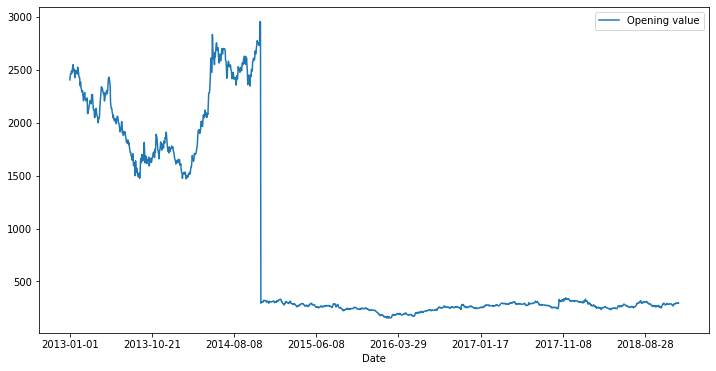

In [24]:
df['Open'].plot(figsize=(12,6), label="Opening value")
plt.legend()
plt.show()


**Step-5** Pre-processing the training data to prepare it for the LSTM model.

In [9]:
# performing data cleaning
df.isna().any()

train_set = df.iloc[:, 0:1].values

# Feature Scaling normalization
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(train_set)

X_train = []
y_train = []
for i in range(60, 1482):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [10]:
X_train.shape

(1422, 60, 1)

The neural network is fed with data and is trained for prediction through assignment of random weights and biases. 

**Step-6** The LSTM model demonstarted in this program is made up of a single input layer that is followed by three consecutive LSTM layers and finally a dense output layer consisting of a linear activation function.

In [11]:
# Initialising the RNN model
regressor = Sequential()

# The input layer of the LSTM is added with some Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))

# The second layer of the LSTM is added with some dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))

# the third layer of the LSTM is added with some dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))

# The fourth and final layer of the LSTM is added with some dropout regularisation
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

# Finally adding the output layer of the model
regressor.add(Dense(units=1))

**Step-7** The model is compiled and then trained.

In [12]:
regressor.compile(optimizer='adam', loss='mean_squared_error')
regressor.fit(X_train, y_train,epochs=15, batch_size=32)

Epoch 1/15
45/45 [==============================] - 5s 116ms/step - loss: 0.0244
Epoch 2/15
45/45 [==============================] - 5s 118ms/step - loss: 0.0076
Epoch 3/15
45/45 [==============================] - 5s 115ms/step - loss: 0.0077
Epoch 4/15
45/45 [==============================] - 5s 120ms/step - loss: 0.0074
Epoch 5/15
45/45 [==============================] - 6s 127ms/step - loss: 0.0066
Epoch 6/15
45/45 [==============================] - 5s 118ms/step - loss: 0.0079
Epoch 7/15
45/45 [==============================] - 6s 123ms/step - loss: 0.0058
Epoch 8/15
45/45 [==============================] - 5s 117ms/step - loss: 0.0055
Epoch 9/15
45/45 [==============================] - 6s 123ms/step - loss: 0.0047
Epoch 10/15
45/45 [==============================] - 6s 125ms/step - loss: 0.0047
Epoch 11/15
45/45 [==============================] - 6s 124ms/step - loss: 0.0046
Epoch 12/15
45/45 [==============================] - 5s 122ms/step - loss: 0.0045
Epoch 13/15
45/45 [======

**Step-8** Preparing the testing data. Data within the period 1st September 2019 to 18th September 2019 is fetched for preparing the testing data set.The data has been fetched using nsepy function and then stored as a csv file. The csv file is to be loaded.

In [13]:
testdataframe = pd.read_csv('/content/drive/My Drive/Colab Notebooks/RNN/stk_test_data.csv')

In [14]:
testdataframe.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2019-01-01,SBIN,EQ,295.90,297.50,300.70,293.85,300.70,299.60,296.77,11837127,3.512877e+14,69723,1668134,0.1409
1,2019-01-02,SBIN,EQ,299.60,299.10,302.50,293.10,293.80,293.90,298.20,25559853,7.622010e+14,162196,7019907,0.2746
2,2019-01-03,SBIN,EQ,293.90,295.00,295.55,290.10,291.05,291.10,292.87,17548347,5.139324e+14,110626,6361787,0.3625
3,2019-01-04,SBIN,EQ,291.10,292.10,299.00,291.50,297.30,297.65,296.18,19514041,5.779686e+14,142962,4963982,0.2544
4,2019-01-07,SBIN,EQ,297.65,301.05,301.50,295.20,296.55,296.30,298.25,14579399,4.348321e+14,113554,4817960,0.3305


In [15]:
testdataframe.shape

(176, 15)

In [16]:
testdata = pd.DataFrame(columns=['Open', 'High', 'Low','Close'])
testdata['Open'] = testdataframe['Open']
testdata['High'] = testdataframe['High']
testdata['Low'] = testdataframe['Low']
testdata['Close'] = testdataframe['Close']
testdata.index = testdataframe['Date']
testdata.isna().any()

Open     False
High     False
Low      False
Close    False
dtype: bool

In [17]:
testdata.head()

,Open,High,Low,Close
Date,,,,
2019-01-01,297.50,300.70,293.85,299.60
2019-01-02,299.10,302.50,293.10,293.90
2019-01-03,295.00,295.55,290.10,291.10
2019-01-04,292.10,299.00,291.50,297.65
2019-01-07,301.05,301.50,295.20,296.30


In [18]:
real_stock_price = testdata.iloc[:, 0:1].values
dataset_total = pd.concat((df['Open'], testdata['Open']), axis=0)

inputs = dataset_total[len(dataset_total) - len(testdata) - 60 :].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

X_test = []
for i in range(60, 235):
    X_test.append(inputs[i-60:i,0])

X_test= np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    

In [19]:
X_test.shape

(175, 60, 1)

**Step-9** Testing the LSTM model on the test dataset

In [20]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

**Step-10** Visualising the prediction

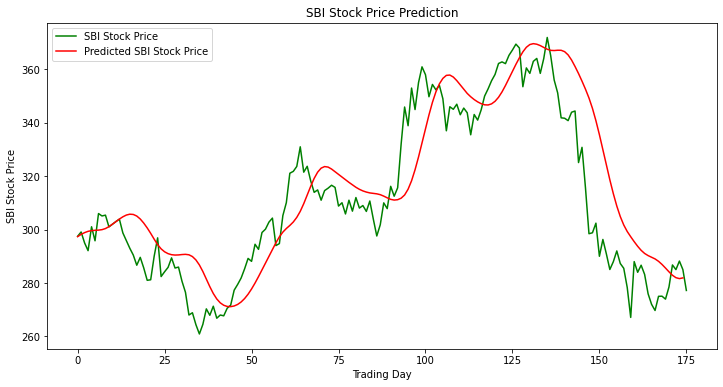

In [25]:
plt.figure(figsize=(12,6))
plt.plot(real_stock_price, color='green', label='SBI Stock Price')
plt.plot(predicted_stock_price, color='red', label='Predicted SBI Stock Price')
plt.title('SBI Stock Price Prediction')
plt.xlabel('Trading Day')
plt.ylabel('SBI Stock Price')
plt.legend()
plt.savefig("/content/drive/My Drive/Colab Notebooks/RNN/predictions.png")
plt.show()

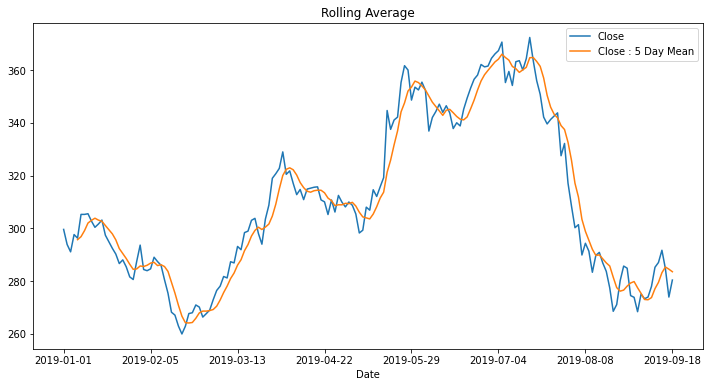

In [26]:
testdata['Close : 5 Day Mean'] = testdata['Close'].rolling(window=5).mean()
testdata[['Close', 'Close : 5 Day Mean']].plot(figsize=(12,6))
plt.title("Rolling Average")
plt.legend()
plt.savefig("/content/drive/My Drive/Colab Notebooks/RNN/rolling_average.png")
plt.show()